##**Cirrhosis Prediction**

**Importing Libraries**

In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ROCAUC
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter('ignore')

**Data Preprocesing**

In [220]:
df = pd.read_csv('cirrhosis.csv')
df.head(5)

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [221]:
df = df.drop(['N_Days','ID'], axis=1)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         418 non-null    object 
 1   Drug           312 non-null    object 
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    object 
 4   Ascites        312 non-null    object 
 5   Hepatomegaly   312 non-null    object 
 6   Spiders        312 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    284 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         310 non-null    float64
 12  Alk_Phos       312 non-null    float64
 13  SGOT           312 non-null    float64
 14  Tryglicerides  282 non-null    float64
 15  Platelets      407 non-null    float64
 16  Prothrombin    416 non-null    float64
 17  Stage          412 non-null    float64
dtypes: float64

In [223]:
df.describe().transpose().style.background_gradient(cmap = 'coolwarm')

In [224]:
df.median()

Age              18628.00
Bilirubin            1.40
Cholesterol        309.50
Albumin              3.53
Copper              73.00
Alk_Phos          1259.00
SGOT               114.70
Tryglicerides      108.00
Platelets          251.00
Prothrombin         10.60
Stage                3.00
dtype: float64

In [225]:
df.skew()

Age              0.086850
Bilirubin        2.717611
Cholesterol      3.408526
Albumin         -0.467527
Copper           2.303640
Alk_Phos         2.992834
SGOT             1.449197
Tryglicerides    2.523902
Platelets        0.627098
Prothrombin      2.223276
Stage           -0.496273
dtype: float64

In [226]:
df.isnull().sum()

Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [227]:
df.dropna(inplace = True)

In [228]:
df.columns

Index(['Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [229]:
df.shape

(276, 18)

**Exploratory Data Analysis**

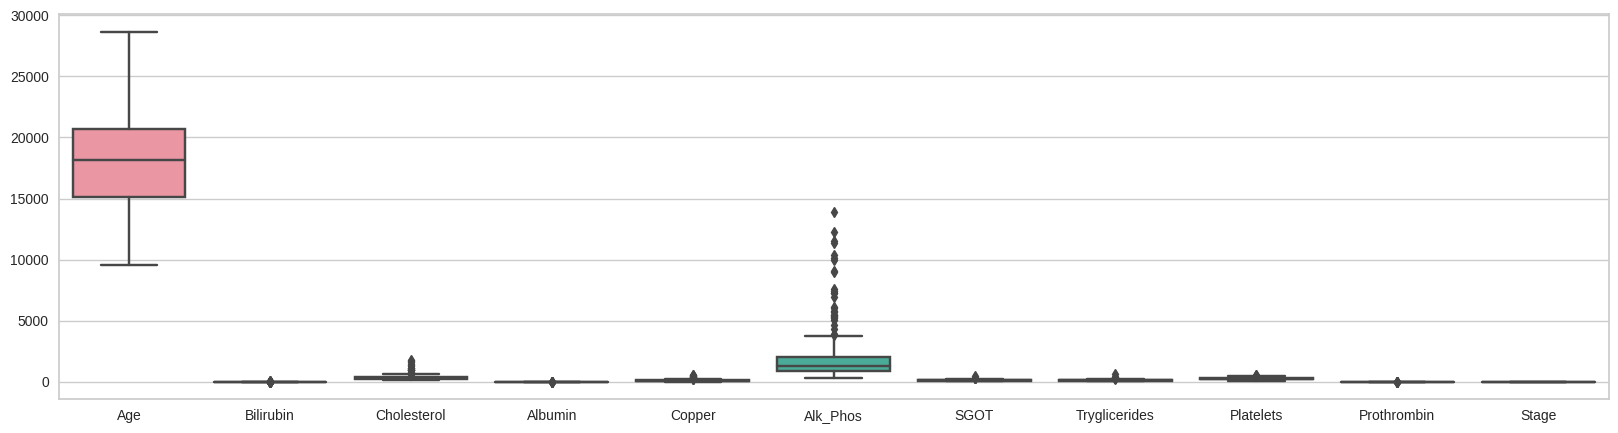

In [230]:
plt.figure(figsize=(20,5))
sns.boxplot(df)
plt.show()

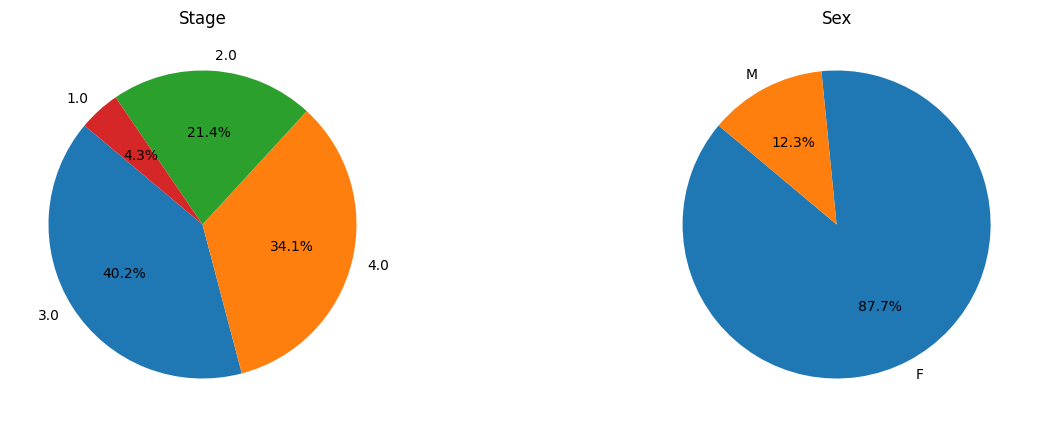

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].pie(df['Stage'].value_counts(), labels=df['Stage'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Stage')

ax[1].pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Sex')

plt.show()


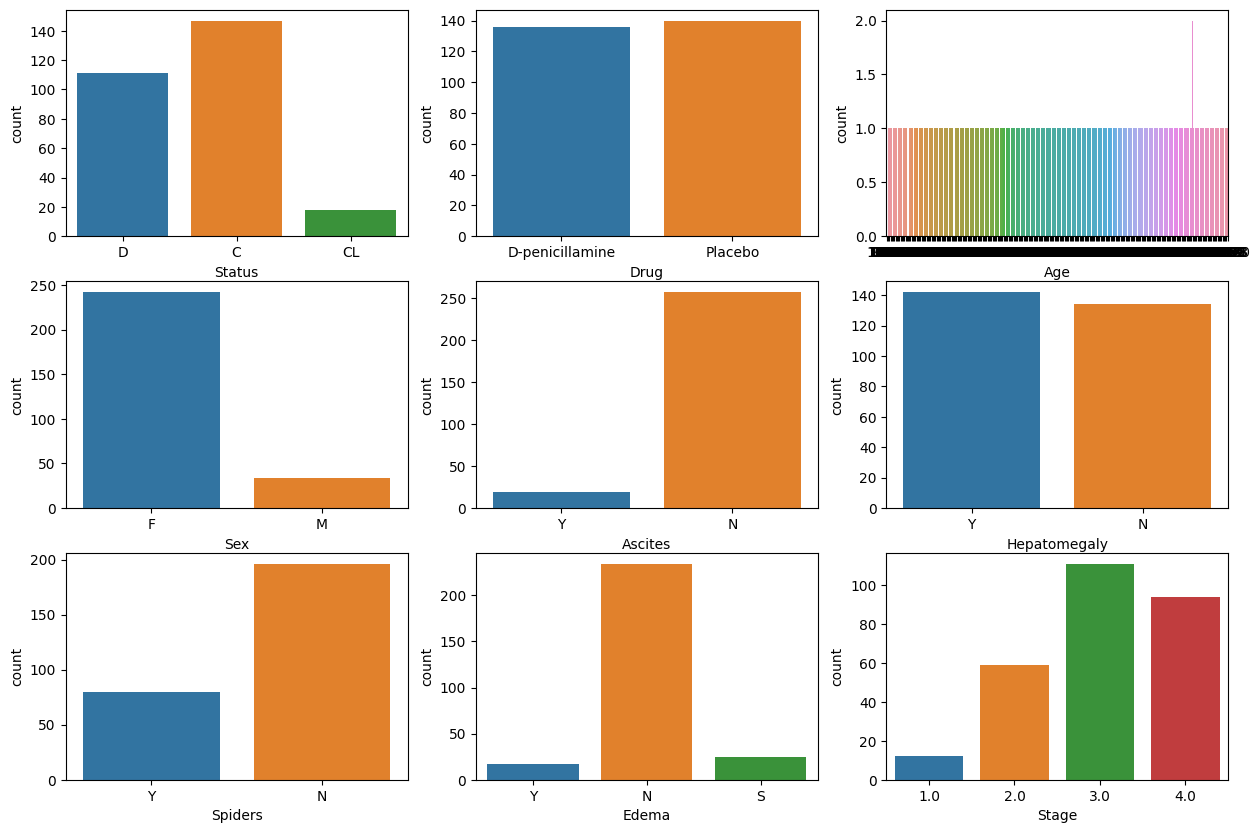

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(data = df, x = 'Status',ax =ax[0,0])
sns.countplot(data = df, x = 'Drug', ax =ax[0,1])
sns.countplot(data = df, x = 'Age', ax =ax[0,2])
sns.countplot(data = df, x = 'Sex', ax =ax[1,0])
sns.countplot(data = df, x = 'Ascites', ax =ax[1,1])
sns.countplot(data = df, x = 'Hepatomegaly', ax =ax[1,2])
sns.countplot(data = df, x = 'Spiders', ax =ax[2,0])
sns.countplot(data = df, x = 'Edema', ax =ax[2,1])
sns.countplot(data = df, x = 'Stage', ax =ax[2,2])

plt.show()

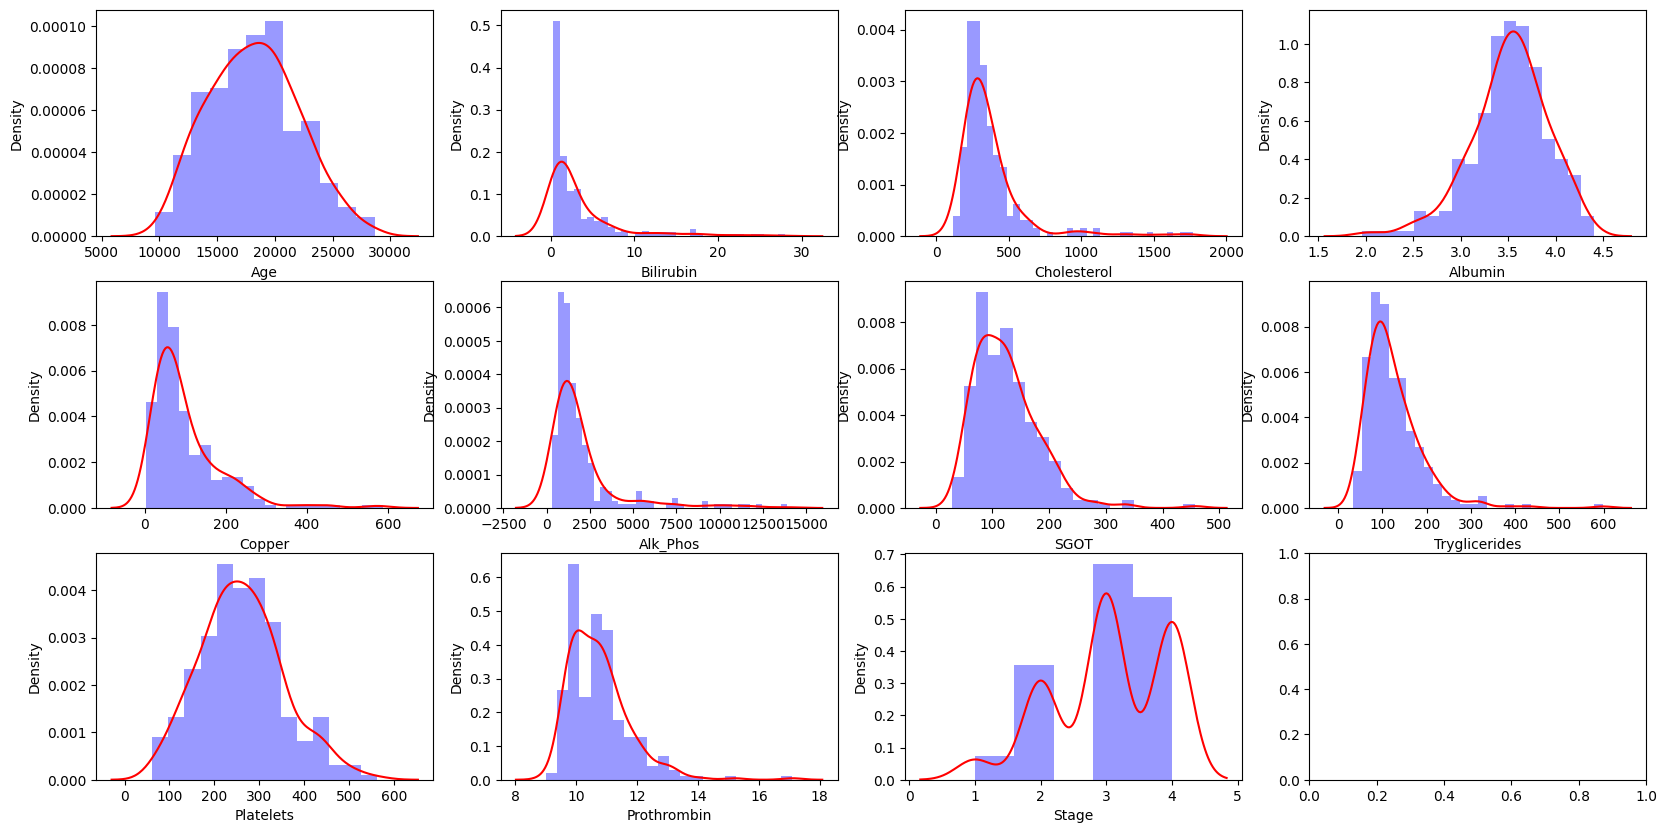

In [23]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))

sns.distplot( df['Age'],kde = True,ax =ax[0,0],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Bilirubin'], kde = True, ax =ax[0,1],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Cholesterol'],kde = True,ax =ax[0,2],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Albumin'], kde = True,ax =ax[0,3],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Copper'], kde = True,ax =ax[1,0],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Alk_Phos'], kde = True,ax =ax[1,1],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['SGOT'], kde = True,ax =ax[1,2],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Tryglicerides'], kde = True,ax =ax[1,3],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Platelets'], kde = True,ax =ax[2,0],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Prothrombin'], kde = True,ax =ax[2,1],color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Stage'], kde = True,ax =ax[2,2],color = 'red', hist_kws={'color': 'blue'})
plt.show()

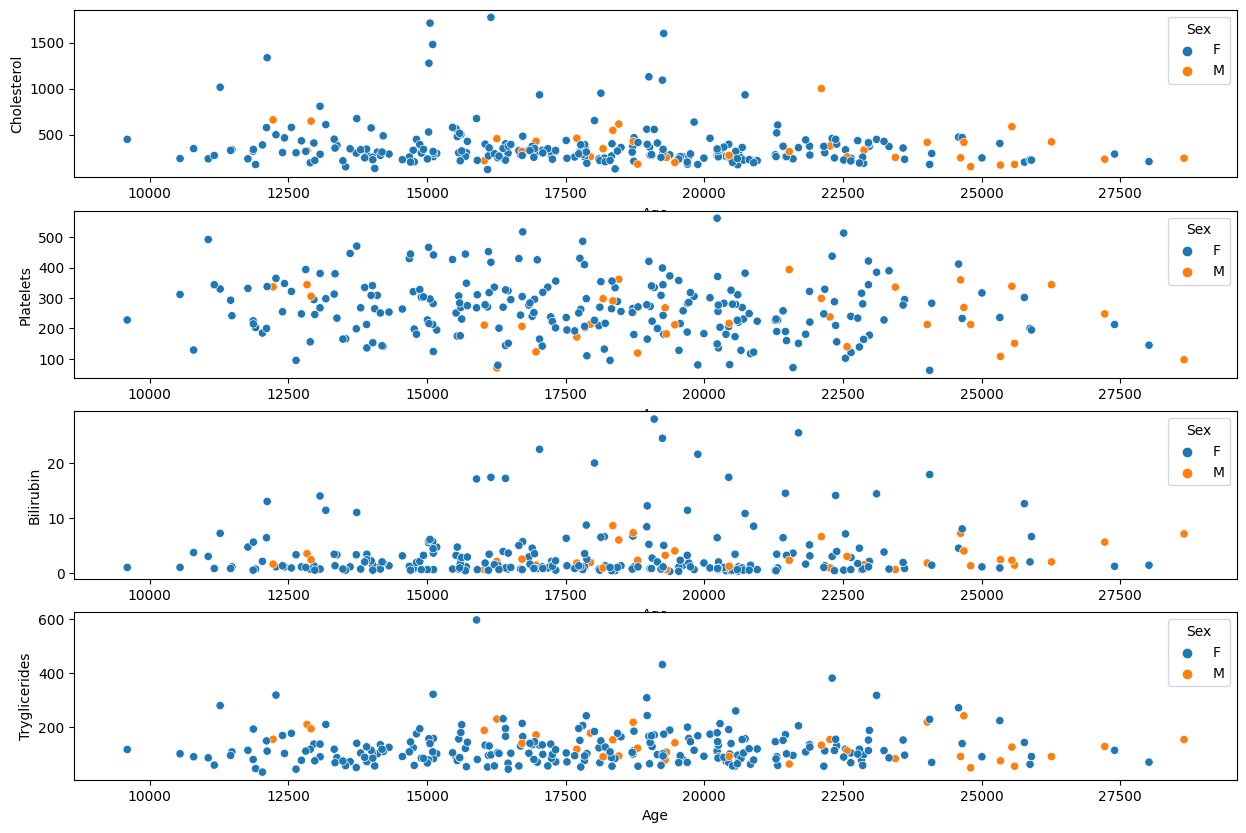

In [37]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))

sns.scatterplot(data=df, x='Age', y='Cholesterol', hue ='Sex', ax = ax[0])
sns.scatterplot(data=df, x='Age', y='Platelets', hue ='Sex', ax = ax[1])
sns.scatterplot(data=df, x='Age', y='Bilirubin', hue ='Sex', ax = ax[2])
sns.scatterplot(data=df, x='Age', y='Tryglicerides', hue ='Sex', ax = ax[3])

plt.show()

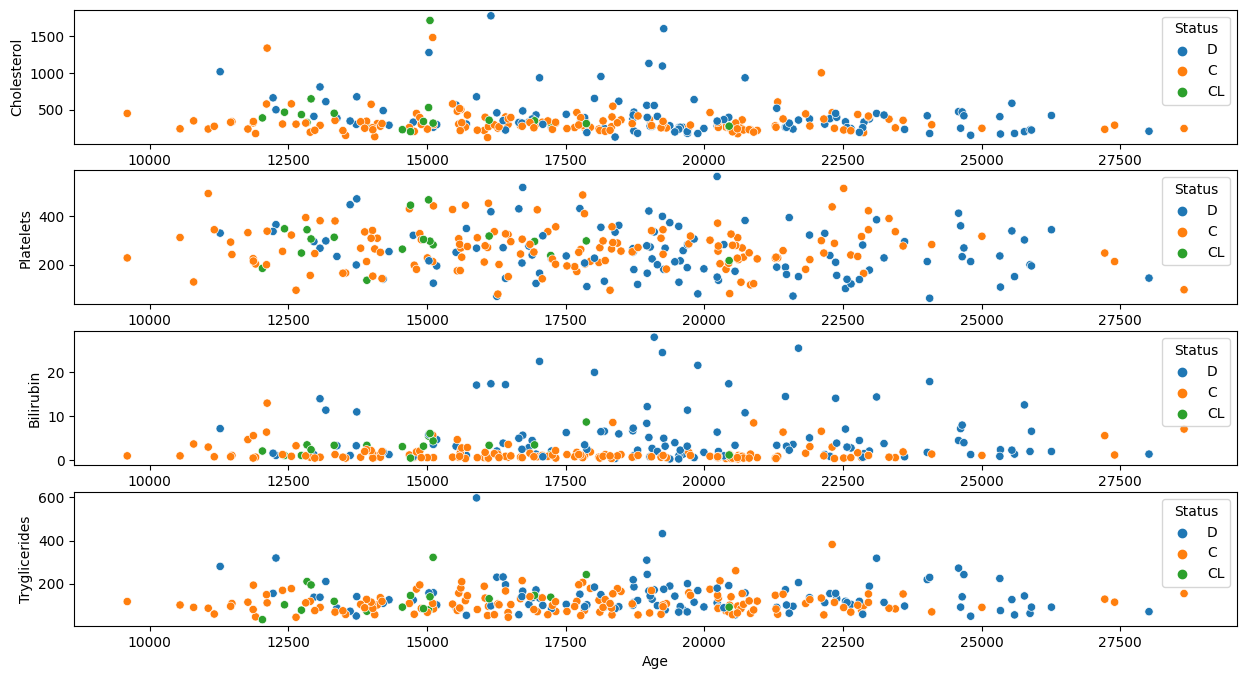

In [41]:
fig, ax = plt.subplots(4, 1, figsize=(15, 8))

sns.scatterplot(data=df, x='Age', y='Cholesterol', hue ='Status', ax = ax[0])
sns.scatterplot(data=df, x='Age', y='Platelets', hue ='Status', ax = ax[1])
sns.scatterplot(data=df, x='Age', y='Bilirubin', hue ='Status', ax = ax[2])
sns.scatterplot(data=df, x='Age', y='Tryglicerides', hue ='Status', ax = ax[3])

plt.show()

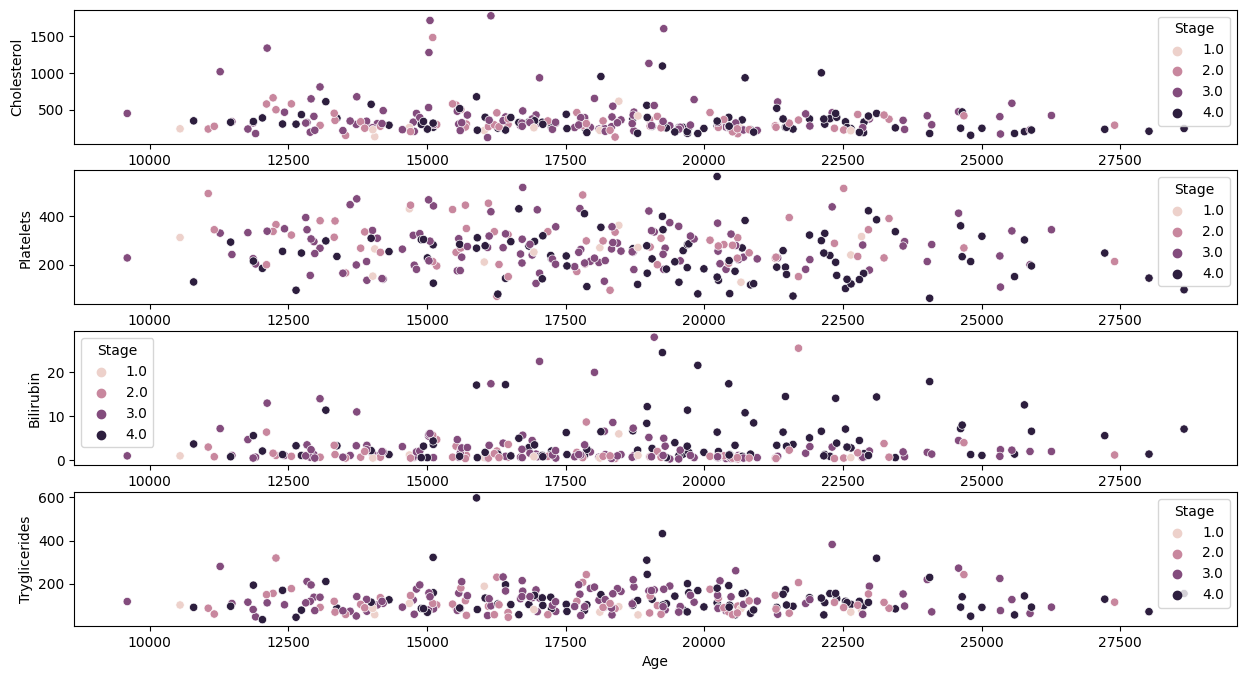

In [42]:
fig, ax = plt.subplots(4, 1, figsize=(15, 8))

sns.scatterplot(data=df, x='Age', y='Cholesterol', hue ='Stage', ax = ax[0])
sns.scatterplot(data=df, x='Age', y='Platelets', hue ='Stage', ax = ax[1])
sns.scatterplot(data=df, x='Age', y='Bilirubin', hue ='Stage', ax = ax[2])
sns.scatterplot(data=df, x='Age', y='Tryglicerides', hue ='Stage', ax = ax[3])

plt.show()

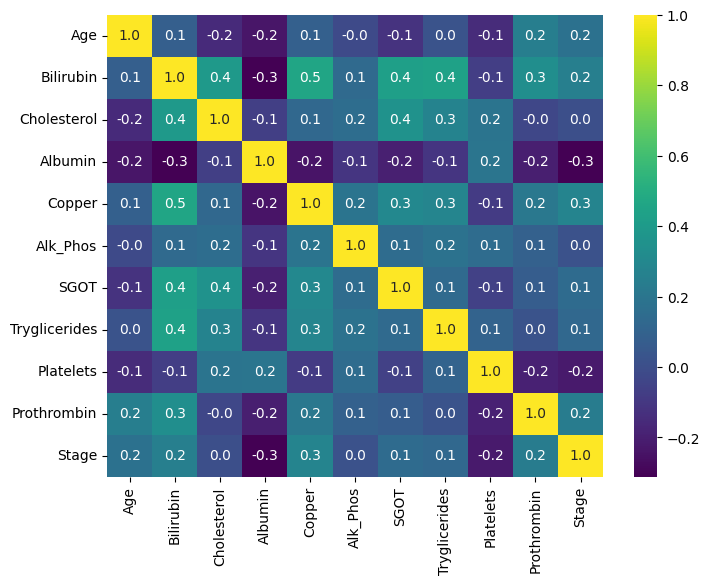

In [67]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'viridis')
plt.show()

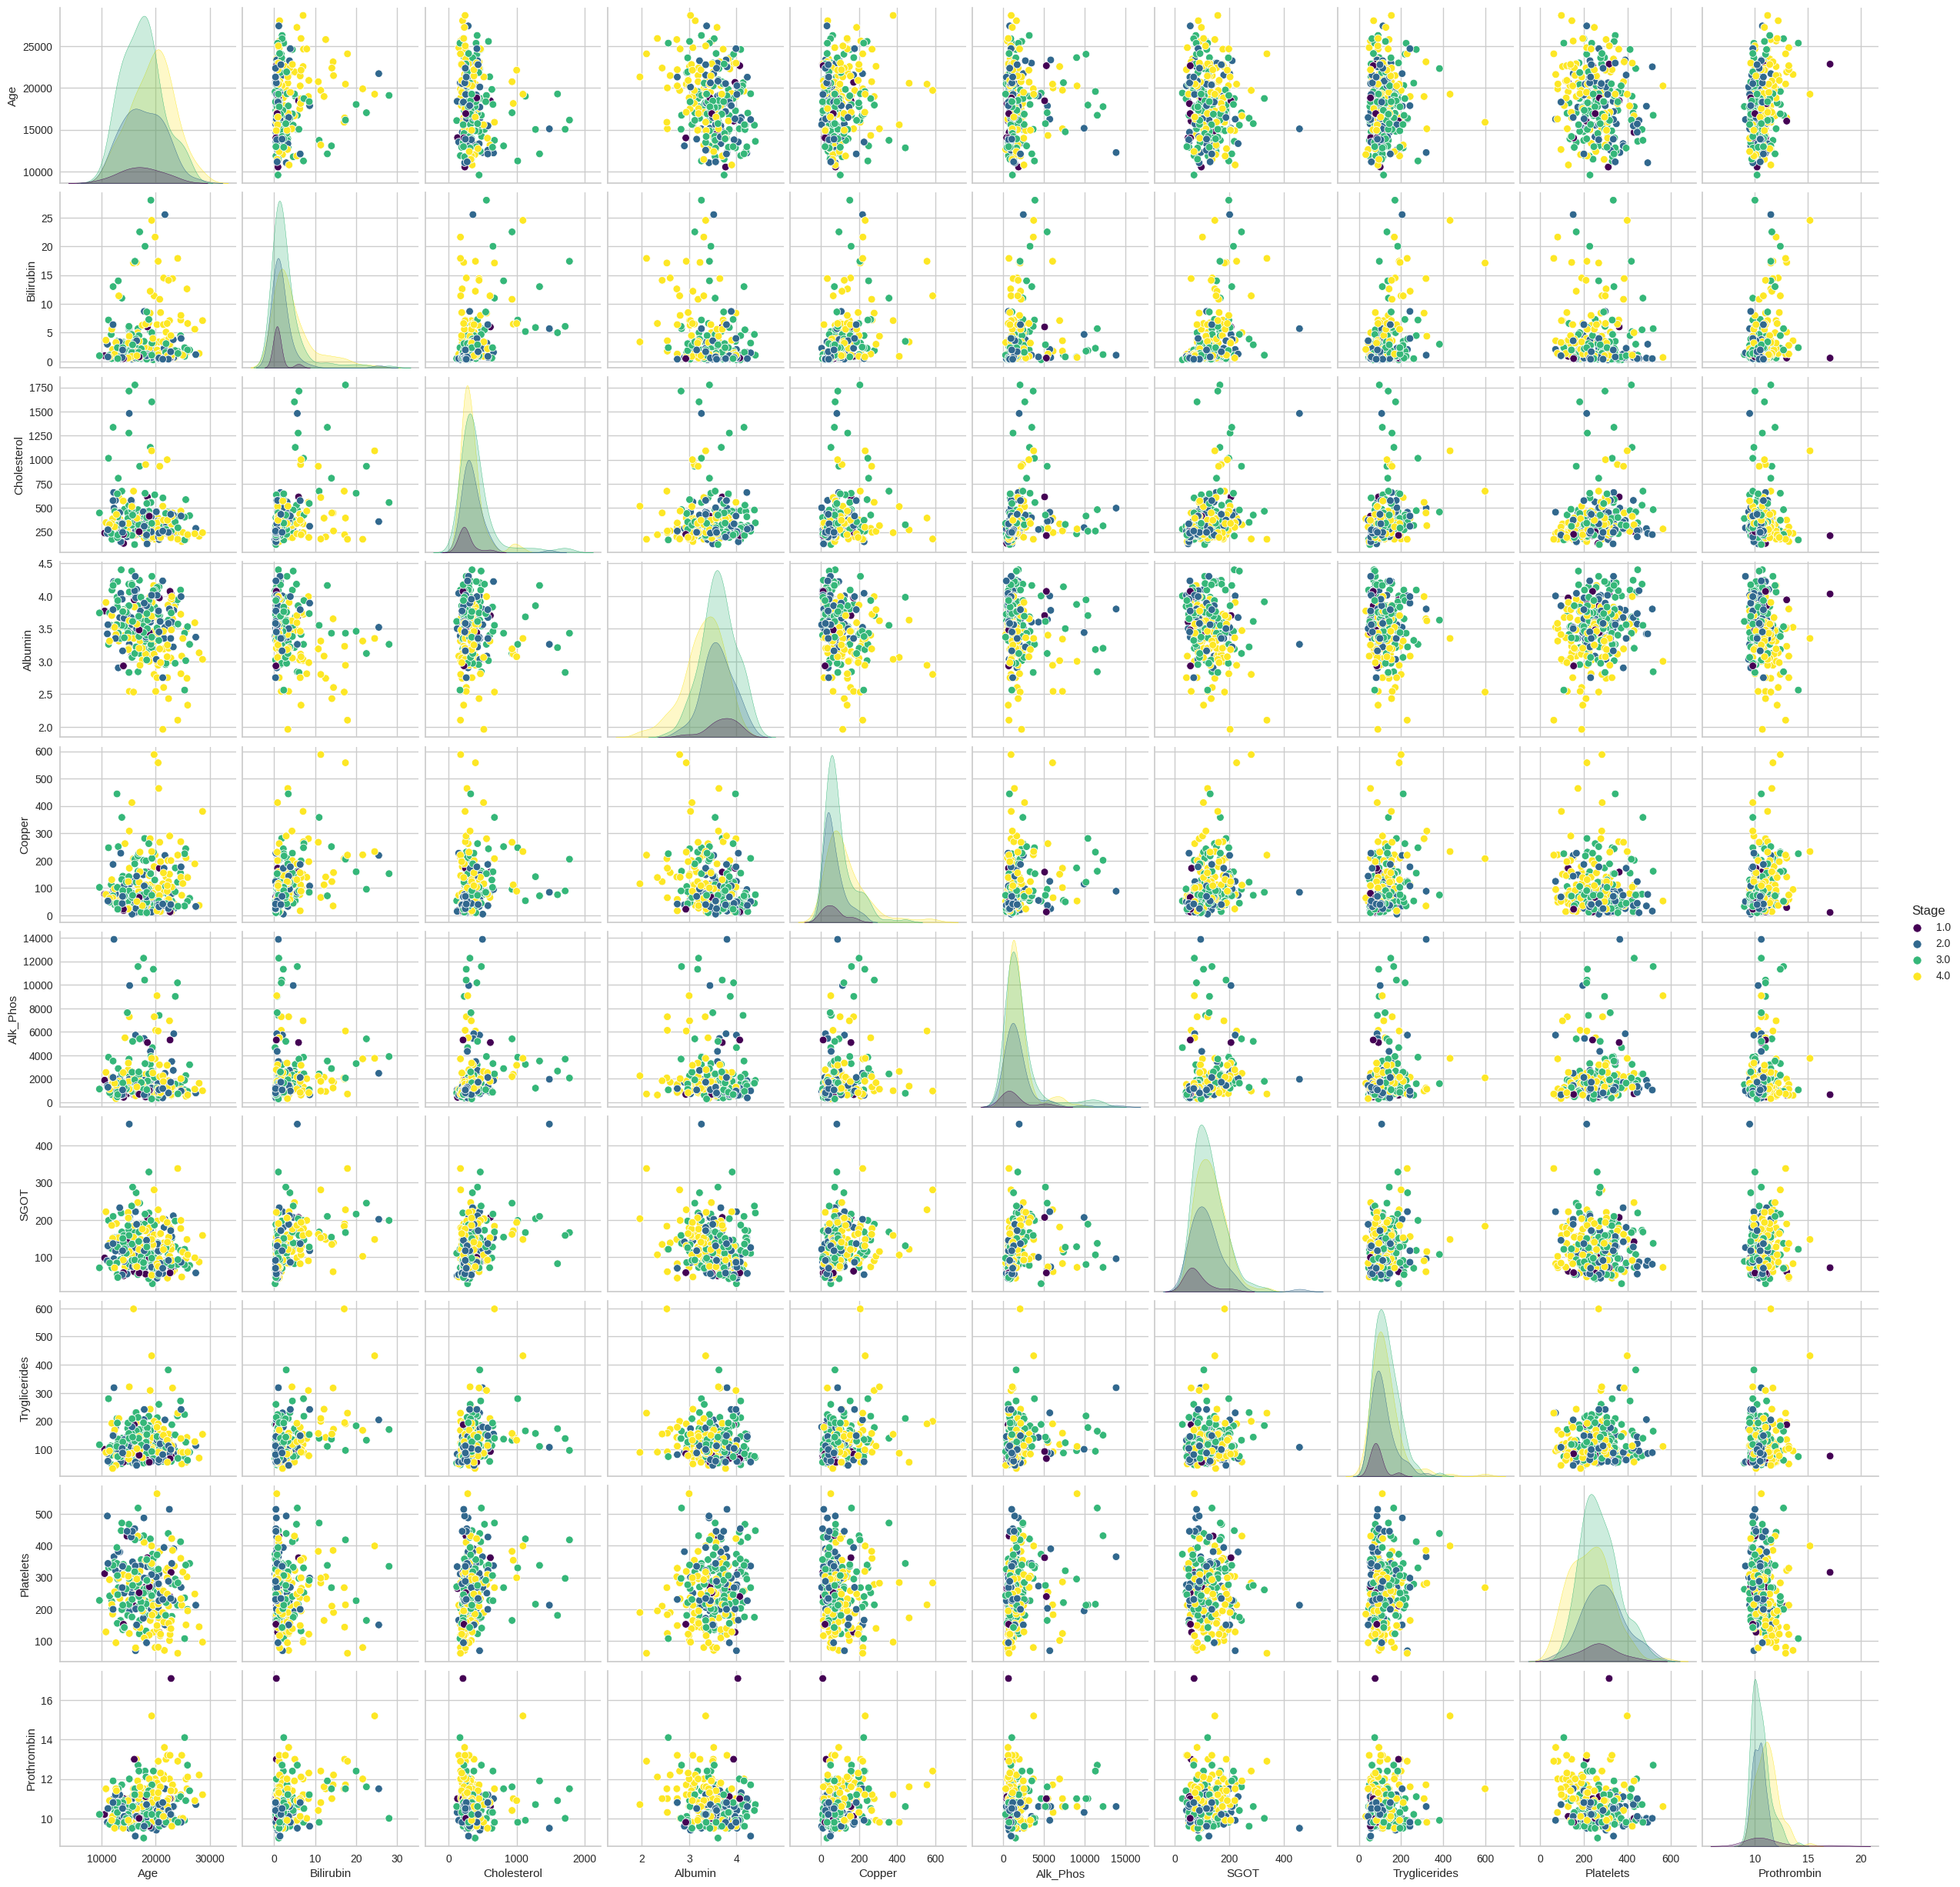

In [233]:
sns.pairplot(df, hue = 'Stage', palette = 'viridis')

**Encoder**

In [194]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['Status'] = lb.fit_transform(df['Status'])
df['Sex'] = lb.fit_transform(df['Sex'])
df['Drug'] = lb.fit_transform(df['Drug'])
df['Ascites'] = lb.fit_transform(df['Ascites'])
df['Hepatomegaly'] = lb.fit_transform(df['Hepatomegaly'])
df['Spiders'] = lb.fit_transform(df['Spiders'])
df['Edema'] = lb.fit_transform(df['Edema'])

df.head(1)

Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
0       2     0  21464    0        1             1        1      2       14.5   

   Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0        261.0      2.6   156.0    1718.0  137.95          172.0      190.0   

   Prothrombin  Stage  
0         12.2    4.0

In [195]:
df = df.drop(['Status'], axis=1)

**Select Best Features**

In [196]:
X = df.drop(columns=['Stage'])
y = df['Stage']

f_scores, p_values = f_regression(X, y)

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores, 'P_Value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='F_Score', ascending=False)
feature_scores_df

Feature    F_Score       P_Value
4    Hepatomegaly  81.644488  3.017912e-17
5         Spiders  30.557346  7.550711e-08
9         Albumin  29.229241  1.400098e-07
3         Ascites  28.358089  2.103262e-07
10         Copper  23.371643  2.228146e-06
6           Edema  22.043931  4.216878e-06
7       Bilirubin  17.935100  3.123692e-05
15    Prothrombin  15.870812  8.697963e-05
14      Platelets  14.142752  2.071805e-04
1             Age   9.067703  2.844421e-03
12           SGOT   5.666313  1.797780e-02
13  Tryglicerides   4.422576  3.637845e-02
0            Drug   1.768756  1.846421e-01
2             Sex   0.320962  5.714939e-01
11       Alk_Phos   0.077547  7.808600e-01
8     Cholesterol   0.005729  9.397210e-01

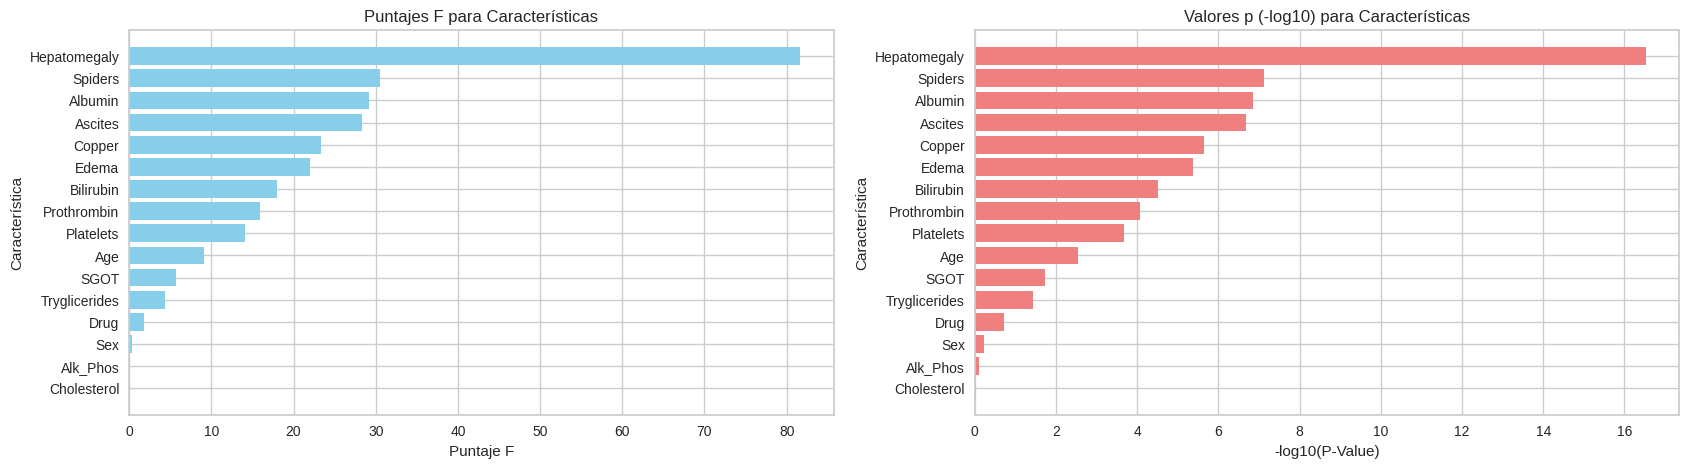

In [197]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].barh(feature_scores_df['Feature'], feature_scores_df['F_Score'], color='skyblue')
ax[0].set_xlabel('Puntaje F')
ax[0].set_ylabel('Característica')
ax[0].set_title('Puntajes F para Características')


ax[1].barh(feature_scores_df['Feature'], -np.log10(feature_scores_df['P_Value']), color='lightcoral')
ax[1].set_xlabel('-log10(P-Value)')
ax[1].set_ylabel('Característica')
ax[1].set_title('Valores p (-log10) para Características')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

In [198]:
cols = feature_scores_df[feature_scores_df['F_Score']>=2].Feature.to_list()

**Modeling and Evaluation**

In [199]:
X_M = df[cols]
Y_M = df['Stage']

**SMOTE**

In [ ]:
sm = SMOTE(k_neighbors = 3)
X_M, Y_M = sm.fit_resample(X_M, Y_M)

scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

**Train Test Split**

In [200]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3, random_state=42)

**Logistic Regression**

In [201]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

         1.0       0.48      0.85      0.61        27
         2.0       0.39      0.26      0.31        35
         3.0       0.41      0.19      0.26        37
         4.0       0.61      0.80      0.69        35

    accuracy                           0.50       134
   macro avg       0.47      0.52      0.47       134
weighted avg       0.47      0.50      0.46       134

accuracy:  0.5
mean_absolute_error:  0.6044776119402985
mean_squared_error:  0.8134328358208955


**Random Forest Classifier**

In [202]:
random_forest_model = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 10000, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

         1.0       0.81      0.96      0.88        27
         2.0       0.69      0.71      0.70        35
         3.0       0.50      0.27      0.35        37
         4.0       0.57      0.74      0.64        35

    accuracy                           0.65       134
   macro avg       0.64      0.67      0.64       134
weighted avg       0.63      0.65      0.63       134

accuracy:  0.6492537313432836
mean_absolute_error:  0.43283582089552236
mean_squared_error:  0.5970149253731343


**Decision Tree**

In [203]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

         1.0       0.80      0.74      0.77        27
         2.0       0.57      0.77      0.66        35
         3.0       0.39      0.32      0.35        37
         4.0       0.58      0.51      0.55        35

    accuracy                           0.57       134
   macro avg       0.59      0.59      0.58       134
weighted avg       0.57      0.57      0.57       134

accuracy:  0.5746268656716418
mean_absolute_error:  0.5223880597014925
mean_squared_error:  0.7313432835820896


3.0    37
2.0    35
4.0    35
1.0    27
Name: Stage, dtype: int64


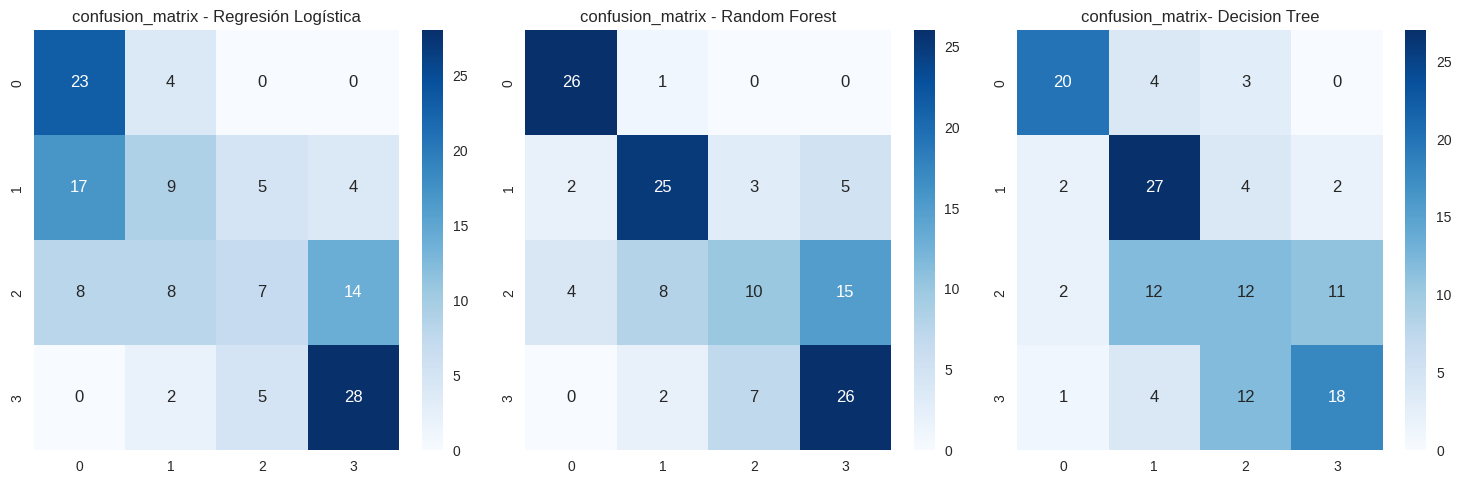

In [235]:
logistic_conf_matrix = confusion_matrix(y_test, model_pred_L)
random_forest_conf_matrix = confusion_matrix(y_test, model_pred_R)
decision_tree_conf_matrix = confusion_matrix(y_test, model_pred_T)

plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.heatmap(logistic_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix - Regresión Logística')

plt.subplot(132)
sns.heatmap(random_forest_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix - Random Forest')

plt.subplot(133)
sns.heatmap(decision_tree_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('confusion_matrix- Decision Tree')

plt.tight_layout()
print(y_test.value_counts())
plt.show()

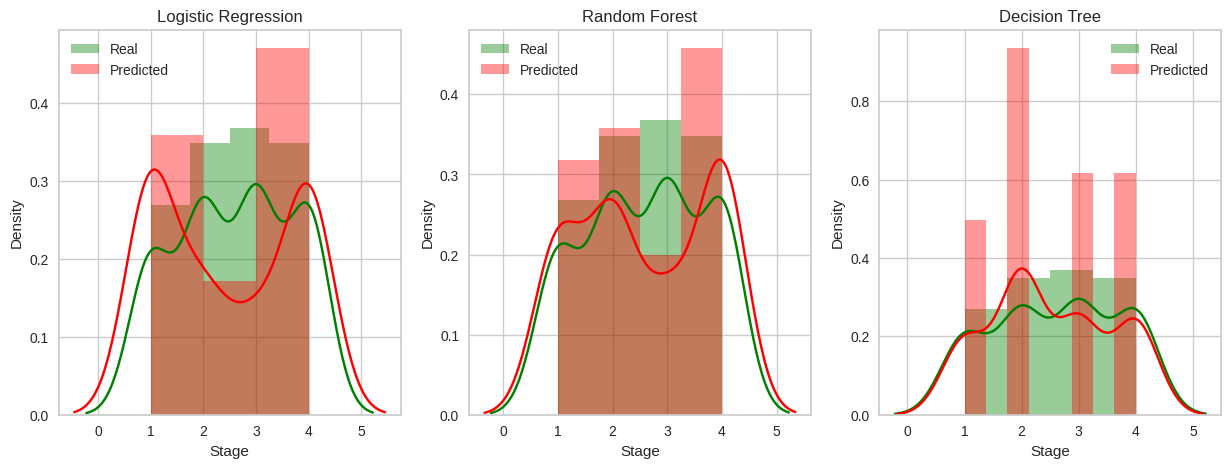

In [205]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('Decision Tree')

ax[0].legend()
ax[1].legend()
ax[2].legend()

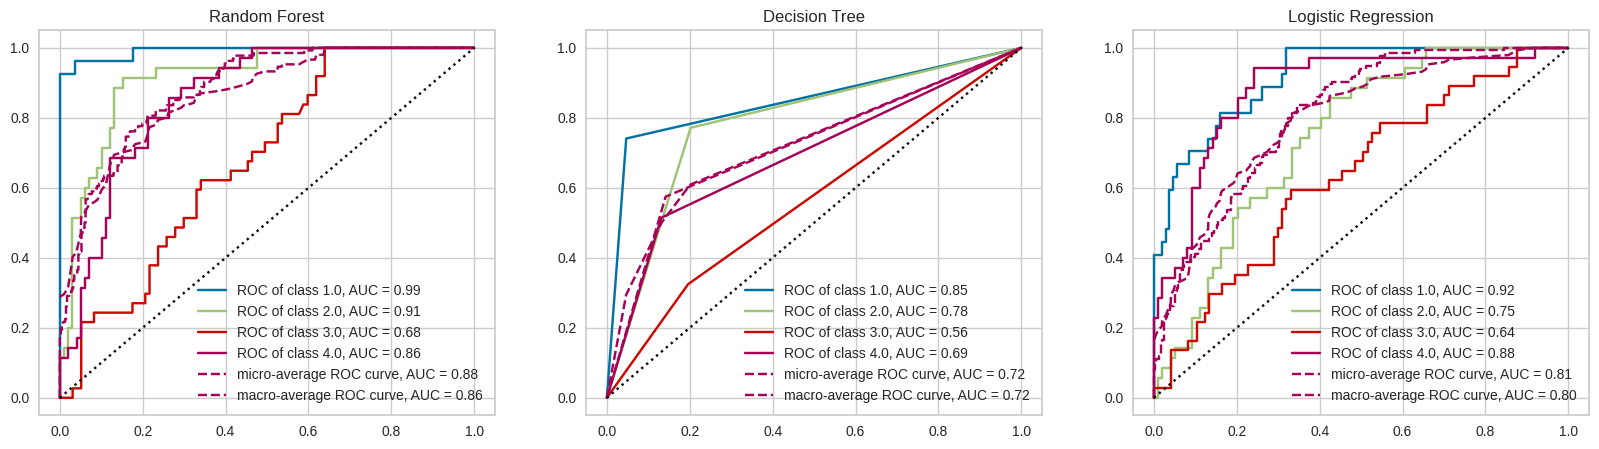

In [236]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

visualizer_train_R = ROCAUC(random_forest_model, ax=axs[0])
visualizer_train_R.fit(X_train, y_train)
visualizer_train_R.score(X_test, y_test)


visualizer_train_D = ROCAUC(decision_tree_model, ax=axs[1])
visualizer_train_D.fit(X_train, y_train)
visualizer_train_D.score(X_test, y_test)


visualizer_train_l = ROCAUC(logistic_model, ax=axs[2])
visualizer_train_l.fit(X_train, y_train)
visualizer_train_l.score(X_test, y_test)

axs[0].set_title('Random Forest')
axs[1].set_title('Decision Tree')
axs[2].set_title('Logistic Regression')

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.show()